In [5]:
!wget -O reddit_posts.json https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EY_R8Y7DkrxMqXGe-zlgeNkBdJU5ZNTf8FYrN2pqDwddMA?download=1

--2023-03-23 20:56:41--  https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EY_R8Y7DkrxMqXGe-zlgeNkBdJU5ZNTf8FYrN2pqDwddMA?download=1
Resolving gla-my.sharepoint.com (gla-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to gla-my.sharepoint.com (gla-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gla-my.sharepoint.com/personal/jake_lever_glasgow_ac_uk/_layouts/15/download.aspx?UniqueId=8ef1d18f92c34cbca9719efb396078d9 [following]
--2023-03-23 20:56:44--  https://gla-my.sharepoint.com/personal/jake_lever_glasgow_ac_uk/_layouts/15/download.aspx?UniqueId=8ef1d18f92c34cbca9719efb396078d9
Reusing existing connection to gla-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1279064 (1.2M) [application/json]
Saving to: ‘reddit_posts.json’

reddit_posts.json   100%[===================>]   1.22M   787KB/s    in 1.6s    

2023-03-23 20:56:46 (787 K

In [2]:
!pip install transformers==4.11.1
!pip install torch torchvision torchaudio
!pip install cloud-tpu-client google-auth requests


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 38.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895259 sha256=751d79b7c79a14ed88aedcae418b288493f07acccebc9977870f396f3bf0e3b1
  Stored in directory: /root/.cache/pip/wheels/12/1c/3d/46cf06718d63a32ff798a89594b61e7f345ab6b36d909ce033
Successfully built sacremoses
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
import json
with open('reddit_posts.json') as f :
  dataset = json.load(f)

len(dataset)

2000

In [ ]:
dataset[:2]

[{'subreddit': 'Soda',
  'title': 'Anyone tried Irn Bru?',
  'score': 8,
  'id': 'ou5yp1',
  'author': 'jackibhoy',
  'body': 'It’s a Scottish drink and it’s banned some countries and I was wondering if anyone here has tried it. It has quite a unique taste and it’s not something you’d forget quickly. You either love it or hate it I think.'},
 {'subreddit': 'Soda',
  'title': 'What is the worst or some of the worst sodas you have drunk',
  'score': 3,
  'id': 'nt40i4',
  'author': 'EpicEllis2004',
  'body': 'The absolute worst soda ive ever had that i can remember is probaly the new mystery fanta or watermelon+strawberry tango some other ones include mango coke, sugar free irn bru (but xtra is nice)'}]

In [4]:

print('min=', min( len(i['body']) for i in dataset ))
print('max=', max( len(i['body']) for i in dataset ))

min= 13
max= 3993


In [7]:
labels, texts = [], []

for i in dataset:
  labels.append(i['subreddit'])
  texts.append(i['title'] + '\n' + i['body'])

In [8]:
for i in dataset[:5]:
    print(i)



{'subreddit': 'Soda', 'title': 'Anyone tried Irn Bru?', 'score': 8, 'id': 'ou5yp1', 'author': 'jackibhoy', 'body': 'It’s a Scottish drink and it’s banned some countries and I was wondering if anyone here has tried it. It has quite a unique taste and it’s not something you’d forget quickly. You either love it or hate it I think.'}
{'subreddit': 'Soda', 'title': 'What is the worst or some of the worst sodas you have drunk', 'score': 3, 'id': 'nt40i4', 'author': 'EpicEllis2004', 'body': 'The absolute worst soda ive ever had that i can remember is probaly the new mystery fanta or watermelon+strawberry tango some other ones include mango coke, sugar free irn bru (but xtra is nice)'}
{'subreddit': 'tea', 'title': 'I once had a box of tea that I believe was Scottish Highland black tea. Can anyone recommend me a tea along those lines?', 'score': 3, 'id': 'rlpmhs', 'author': 'dazzletina', 'body': "I'd like to repurchase this tea but I cannot find the exact box and don't want to buy something I 

In [9]:
from collections import Counter
Counter(labels)

Counter({'Soda': 174,
         'tea': 236,
         'xbox': 213,
         'antiMLM': 226,
         'HydroHomies': 210,
         'pcgaming': 225,
         'NintendoSwitch': 249,
         'Coffee': 234,
         'PS4': 233})

In [10]:
# ANSWER

from sklearn.model_selection import train_test_split

texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)
texts_train, texts_val, labels_train, labels_val = train_test_split(texts_train, labels_train, test_size=0.25, random_state=42)

In [ ]:
import pandas as pd

# calculate label counts for each split
train_counts = pd.Series(labels_train).value_counts().sort_index()
val_counts = pd.Series(labels_val).value_counts().sort_index()
test_counts = pd.Series(labels_test).value_counts().sort_index()

# create a table with the label counts for each split
label_table = pd.DataFrame({'Train': train_counts, 'Validation': val_counts, 'Test': test_counts})
label_table.index.name = 'Label'
print(label_table)


                Train  Validation  Test
Label                                  
Coffee            135          40    59
HydroHomies       117          45    48
NintendoSwitch    156          55    38
PS4               148          35    50
Soda              104          38    32
antiMLM           132          47    47
pcgaming          134          51    40
tea               149          46    41
xbox              125          43    45


In [ ]:
print(f"{len(texts_train)=}\t{len(labels_train)=}")
print(f"{len(texts_val)=}\t{len(labels_val)=}")
print(f"{len(texts_test)=}\t{len(labels_test)=}")

len(texts_train)=1200	len(labels_train)=1200
len(texts_val)=400	len(labels_val)=400
len(texts_test)=400	len(labels_test)=400


In [ ]:
print(f"{(texts_train[:5])=}\n{(labels_train[:5])=}\n\n")
print(f"{(texts_val[:5])=}\n{(labels_val[:5])=}\n\n")
print(f"{(texts_test[:5])=}\n{(labels_test[:5])=}")

(texts_train[:5])=['[For EU PSN] Just noticed Q.U.B.E. 2 is up for pre-order on PSN store and releases tomorrow. It has a 20% discount for PS+ subscribers\nDiscount expires tomorrow at 12:00 am GMT. With the discount it cost £12.79.\nPSN store link', "Bought a new blend and my coffee grinder just spits it everywhere! Static? Sticky?\nI bought a new blend (Rocket Fuel by Tynemouth Coffee Company). When I grind, it throws coffee grounds everywhere, causing a mess and wasting coffee.\nI've used two other blends in this machine (Alcafé Italian and Ouseburn Foundry Number 1) and they work fine. It's why I'm hesitant to say it's static since those blends don't cling to the side of the outlet and get thrown everywhere. Maybe the beans are just oily and cling?\nAny tips for reducing static in a Sette 270 so I can be sure?", 'Attended a Bridal Show or other expo and now getting Marketing Emails from MLM reps? WELL! Let me introduce you to the CAN-SPAM act, a real law enforced by the FTC\nOnce y

In [ ]:
dataset[:2]

[{'subreddit': 'Soda',
  'title': 'Anyone tried Irn Bru?',
  'score': 8,
  'id': 'ou5yp1',
  'author': 'jackibhoy',
  'body': 'It’s a Scottish drink and it’s banned some countries and I was wondering if anyone here has tried it. It has quite a unique taste and it’s not something you’d forget quickly. You either love it or hate it I think.'},
 {'subreddit': 'Soda',
  'title': 'What is the worst or some of the worst sodas you have drunk',
  'score': 3,
  'id': 'nt40i4',
  'author': 'EpicEllis2004',
  'body': 'The absolute worst soda ive ever had that i can remember is probaly the new mystery fanta or watermelon+strawberry tango some other ones include mango coke, sugar free irn bru (but xtra is nice)'}]

In [11]:
labels, texts = [], []

for doc in dataset[:2]:
  labels.append(i['subreddit'])
  texts.append(i['title'] + '\n' + i['body'])


In [12]:
for i in dataset[:5]:
    print(i)


{'subreddit': 'Soda', 'title': 'Anyone tried Irn Bru?', 'score': 8, 'id': 'ou5yp1', 'author': 'jackibhoy', 'body': 'It’s a Scottish drink and it’s banned some countries and I was wondering if anyone here has tried it. It has quite a unique taste and it’s not something you’d forget quickly. You either love it or hate it I think.'}
{'subreddit': 'Soda', 'title': 'What is the worst or some of the worst sodas you have drunk', 'score': 3, 'id': 'nt40i4', 'author': 'EpicEllis2004', 'body': 'The absolute worst soda ive ever had that i can remember is probaly the new mystery fanta or watermelon+strawberry tango some other ones include mango coke, sugar free irn bru (but xtra is nice)'}
{'subreddit': 'tea', 'title': 'I once had a box of tea that I believe was Scottish Highland black tea. Can anyone recommend me a tea along those lines?', 'score': 3, 'id': 'rlpmhs', 'author': 'dazzletina', 'body': "I'd like to repurchase this tea but I cannot find the exact box and don't want to buy something I 

In [10]:
total = len(texts_train) + len(texts_val) + len(texts_test)
len(texts_train)/total, len(texts_val)/total, len(texts_test)/total

(0.6, 0.2, 0.2)

In [ ]:
print(type(texts_train))
print(type(texts_train[0]))
print(type(texts_test))
print(type(texts_test[0]))
print(type(texts_val))
print(type(texts_val[0]))

<class 'list'>
<class 'str'>
<class 'list'>
<class 'str'>
<class 'list'>
<class 'str'>


In [13]:
import re

def remove_non_text(text):
    pattern = r'[^A-Za-z\s]+'
    text = re.sub(pattern, '', text)
    return text




In [14]:
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess_initial(text):
    text = remove_non_text(text)
    doc = nlp(text)
    preprocessed_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space and not token.text.startswith("http") and not token.is_digit and not token.is_currency and not token.like_url and not token.like_email]
    return preprocessed_tokens



def preprocess_dataset_final(dataset):
    preprocessed_dataset = []
    for i in dataset:
        preprocessed_core = {}
        preprocessed_core["text"] = preprocess_initial(i["text"])
        preprocessed_core["label"] = i["label"]
        preprocessed_core.append(preprocessed_core)
    return preprocessed_dataset


# Preprocess the data sets
preprocessed_texts_train = []
for i in range(len(texts_train)):
    preprocessed_texts_train.append({"text": preprocess_initial(texts_train[i]), "label": labels_train[i]})

    preprocessed_texts_val = []
for i in range(len(texts_val)):
    preprocessed_texts_val.append({"text": preprocess_initial(texts_val[i]), "label": labels_val[i]})

preprocessed_texts_test = []
for i in range(len(texts_test)):
    preprocessed_texts_test.append({"text": preprocess_initial(texts_test[i]), "label": labels_test[i]})



/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
print(preprocessed_texts_train[0])


{'text': ['EU', 'PSN', 'notice', 'QUBE', 'preorder', 'PSN', 'store', 'release', 'tomorrow', 'discount', 'PS', 'subscriber', 'Discount', 'expire', 'tomorrow', 'GMT', 'discount', 'cost', 'PSN', 'store', 'link'], 'label': 'PS4'}


In [ ]:
print("Preprocessed Training Set:")
print(preprocessed_texts_train)

print("Preprocessed Validation Set:")
print(preprocessed_texts_val)

print("Preprocessed Test Set:")
print(preprocessed_texts_test)

Preprocessed Training Set:
[{'text': ['EU', 'PSN', 'notice', 'QUBE', 'preorder', 'PSN', 'store', 'release', 'tomorrow', 'discount', 'PS', 'subscriber', 'Discount', 'expire', 'tomorrow', 'GMT', 'discount', 'cost', 'PSN', 'store', 'link'], 'label': 'PS4'}, {'text': ['buy', 'new', 'blend', 'coffee', 'grinder', 'spit', 'Static', 'Sticky', 'buy', 'new', 'blend', 'Rocket', 'Fuel', 'Tynemouth', 'Coffee', 'Company', 'grind', 'throw', 'coffee', 'ground', 'cause', 'mess', 'waste', 'coffee', 've', 'blend', 'machine', 'Alcaf', 'italian', 'Ouseburn', 'Foundry', 'Number', 'work', 'fine', 'm', 'hesitant', 'static', 'blend', 'not', 'cling', 'outlet', 'throw', 'maybe', 'bean', 'oily', 'cle', 'tip', 'reduce', 'static', 'Sette', 'sure'], 'label': 'Coffee'}, {'text': ['attend', 'Bridal', 'expo', 'get', 'Marketing', 'Emails', 'MLM', 'reps', 'let', 'introduce', 'CANSPAM', 'act', 'real', 'law', 'enforce', 'FTC', 'information', 'sold', 'provide', 'way', 'distribute', 'MLMers', 's', 'protection', 'MLM', 'rep',

In [ ]:
print("Preprocessed Training Set:")
print(preprocessed_texts_train)

print("Preprocessed Validation Set:")
print(preprocessed_texts_val)

print("Preprocessed Test Set:")
print(preprocessed_texts_test)

Preprocessed Training Set:
[{'text': ['EU', 'PSN', 'notice', 'QUBE', 'preorder', 'PSN', 'store', 'release', 'tomorrow', 'discount', 'PS', 'subscriber', 'Discount', 'expire', 'tomorrow', 'GMT', 'discount', 'cost', 'PSN', 'store', 'link'], 'label': 'PS4'}, {'text': ['buy', 'new', 'blend', 'coffee', 'grinder', 'spit', 'Static', 'Sticky', 'buy', 'new', 'blend', 'Rocket', 'Fuel', 'Tynemouth', 'Coffee', 'Company', 'grind', 'throw', 'coffee', 'ground', 'cause', 'mess', 'waste', 'coffee', 've', 'blend', 'machine', 'Alcaf', 'italian', 'Ouseburn', 'Foundry', 'Number', 'work', 'fine', 'm', 'hesitant', 'static', 'blend', 'not', 'cling', 'outlet', 'throw', 'maybe', 'bean', 'oily', 'cle', 'tip', 'reduce', 'static', 'Sette', 'sure'], 'label': 'Coffee'}, {'text': ['attend', 'Bridal', 'expo', 'get', 'Marketing', 'Emails', 'MLM', 'reps', 'let', 'introduce', 'CANSPAM', 'act', 'real', 'law', 'enforce', 'FTC', 'information', 'sold', 'provide', 'way', 'distribute', 'MLMers', 's', 'protection', 'MLM', 'rep',

In [ ]:
unique_labels = {i['label'] for i in preprocessed_texts_train}
print(unique_labels)


{'Coffee', 'antiMLM', 'tea', 'NintendoSwitch', 'Soda', 'HydroHomies', 'PS4', 'pcgaming', 'xbox'}


In [ ]:
preprocessed_texts_train

[{'text': ['EU',
   'PSN',
   'notice',
   'QUBE',
   'preorder',
   'PSN',
   'store',
   'release',
   'tomorrow',
   'discount',
   'PS',
   'subscriber',
   'Discount',
   'expire',
   'tomorrow',
   'GMT',
   'discount',
   'cost',
   'PSN',
   'store',
   'link'],
  'label': 'PS4'},
 {'text': ['buy',
   'new',
   'blend',
   'coffee',
   'grinder',
   'spit',
   'Static',
   'Sticky',
   'buy',
   'new',
   'blend',
   'Rocket',
   'Fuel',
   'Tynemouth',
   'Coffee',
   'Company',
   'grind',
   'throw',
   'coffee',
   'ground',
   'cause',
   'mess',
   'waste',
   'coffee',
   've',
   'blend',
   'machine',
   'Alcaf',
   'italian',
   'Ouseburn',
   'Foundry',
   'Number',
   'work',
   'fine',
   'm',
   'hesitant',
   'static',
   'blend',
   'not',
   'cling',
   'outlet',
   'throw',
   'maybe',
   'bean',
   'oily',
   'cle',
   'tip',
   'reduce',
   'static',
   'Sette',
   'sure'],
  'label': 'Coffee'},
 {'text': ['attend',
   'Bridal',
   'expo',
   'get',
   'Mark

In [ ]:
token2int_dataset = {}

counter = 0

for i in preprocessed_texts_train:

    for token in i['text']:
         if token not in token2int_dataset:
            token2int_dataset[token] = counter
            counter += 1

# Loop through the preprocessed training set again and create a new dictionary 
preprocessed_training_set_int = []
for i in preprocessed_texts_train:
    Integer_Set = {'label': i['label'], 'text': [(token, token2int_dataset[token]) for token in i['text']]}
    preprocessed_training_set_int.append(Integer_Set)

# Print the first example in the new preprocessed training set
print(preprocessed_training_set_int[0])


{'label': 'PS4', 'text': [('EU', 0), ('PSN', 1), ('notice', 2), ('QUBE', 3), ('preorder', 4), ('PSN', 1), ('store', 5), ('release', 6), ('tomorrow', 7), ('discount', 8), ('PS', 9), ('subscriber', 10), ('Discount', 11), ('expire', 12), ('tomorrow', 7), ('GMT', 13), ('discount', 8), ('cost', 14), ('PSN', 1), ('store', 5), ('link', 15)]}


In [ ]:
preprocessed_training_set_int

[{'label': 'PS4',
  'text': [('EU', 0),
   ('PSN', 1),
   ('notice', 2),
   ('QUBE', 3),
   ('preorder', 4),
   ('PSN', 1),
   ('store', 5),
   ('release', 6),
   ('tomorrow', 7),
   ('discount', 8),
   ('PS', 9),
   ('subscriber', 10),
   ('Discount', 11),
   ('expire', 12),
   ('tomorrow', 7),
   ('GMT', 13),
   ('discount', 8),
   ('cost', 14),
   ('PSN', 1),
   ('store', 5),
   ('link', 15)]},
 {'label': 'Coffee',
  'text': [('buy', 16),
   ('new', 17),
   ('blend', 18),
   ('coffee', 19),
   ('grinder', 20),
   ('spit', 21),
   ('Static', 22),
   ('Sticky', 23),
   ('buy', 16),
   ('new', 17),
   ('blend', 18),
   ('Rocket', 24),
   ('Fuel', 25),
   ('Tynemouth', 26),
   ('Coffee', 27),
   ('Company', 28),
   ('grind', 29),
   ('throw', 30),
   ('coffee', 19),
   ('ground', 31),
   ('cause', 32),
   ('mess', 33),
   ('waste', 34),
   ('coffee', 19),
   ('ve', 35),
   ('blend', 18),
   ('machine', 36),
   ('Alcaf', 37),
   ('italian', 38),
   ('Ouseburn', 39),
   ('Foundry', 40),
 

In [ ]:
def make_onehot_sparse(tokens, vocab):
    # Initialize an empty sparse vector
    sparse_vector = {}
    
    # For each unique token in the input tokens list, add a 1 to the corresponding index in the sparse vector
    for token in set(tokens):
        if token in vocab:
            sparse_vector[vocab[token]] = 1
    
    return sparse_vector


In [ ]:
# Create a vocabulary dictionary mapping integer tokens to unique integer IDs
vocab = {}
for i in preprocessed_training_set_int:
    for token in i['text']:
        if token[1] not in vocab:
            vocab[token[1]] = len(vocab)

# Convert the preprocessed training set with integer tokens to one-hot sparse vectors
preprocessed_training_set_onehot = []
for i in preprocessed_training_set_int:
    sparse_vector = make_onehot_sparse([pair[1] for pair in i['text']], vocab)
    preprocessed_training_set_onehot.append({'label': i['label'], 'text': sparse_vector})


In [ ]:
preprocessed_training_set_onehot

[{'label': 'PS4',
  'text': {0: 1,
   1: 1,
   2: 1,
   3: 1,
   4: 1,
   5: 1,
   6: 1,
   7: 1,
   8: 1,
   9: 1,
   10: 1,
   11: 1,
   12: 1,
   13: 1,
   14: 1,
   15: 1}},
 {'label': 'Coffee',
  'text': {16: 1,
   17: 1,
   18: 1,
   19: 1,
   20: 1,
   21: 1,
   22: 1,
   23: 1,
   24: 1,
   25: 1,
   26: 1,
   27: 1,
   28: 1,
   29: 1,
   30: 1,
   31: 1,
   32: 1,
   33: 1,
   34: 1,
   35: 1,
   36: 1,
   37: 1,
   38: 1,
   39: 1,
   40: 1,
   41: 1,
   42: 1,
   43: 1,
   44: 1,
   45: 1,
   46: 1,
   47: 1,
   48: 1,
   49: 1,
   50: 1,
   51: 1,
   52: 1,
   53: 1,
   54: 1,
   55: 1,
   56: 1,
   57: 1}},
 {'label': 'antiMLM',
  'text': {43: 1,
   47: 1,
   58: 1,
   59: 1,
   60: 1,
   61: 1,
   62: 1,
   63: 1,
   64: 1,
   65: 1,
   66: 1,
   67: 1,
   68: 1,
   69: 1,
   70: 1,
   71: 1,
   72: 1,
   73: 1,
   74: 1,
   75: 1,
   76: 1,
   77: 1,
   78: 1,
   79: 1,
   80: 1,
   81: 1,
   82: 1,
   83: 1,
   84: 1,
   85: 1,
   86: 1,
   87: 1,
   88: 1,
   89: 1,
 

In [ ]:
import math

# Calculate term frequency (TF)
preprocessed_training_set_tf = []
for i in preprocessed_training_set_onehot:
    term_fre_data = {}
    for token_id, Term_value in i['text'].items():
        term_fre_data[token_id] = Term_value / len(i['text'])
    preprocessed_training_set_tf.append({'label': i['label'], 'text': term_fre_data})

# Calculate inverse document frequency (IDF)
preprocessed_training_set_idf = {}
num_documents = len(preprocessed_training_set_tf)
for i in preprocessed_training_set_tf:
    for token_id, Term_value in i['text'].items():
        if token_id not in preprocessed_training_set_idf:
            num_occurrences = sum([1 for ex in preprocessed_training_set_tf if token_id in ex['text']])
            preprocessed_training_set_idf[token_id] = math.log(num_documents / num_occurrences)

# Combine TF and IDF to create TF-IDF vectors
preprocessed_training_set_tfidf = []
for i in preprocessed_training_set_tf:
    tfidf = {}
    for token_id, tf_value in i['text'].items():
        idf_value = preprocessed_training_set_idf[token_id]
        tfidf[token_id] = tf_value * idf_value
    preprocessed_training_set_tfidf.append({'label': i['label'], 'text': tfidf})


In [ ]:
preprocessed_training_set_tfidf

[{'label': 'PS4',
  'text': {0: 0.39980810345100914,
   1: 0.34253993270887445,
   2: 0.19267147815897628,
   3: 0.39980810345100914,
   4: 0.32151041792004864,
   5: 0.18418388183653495,
   6: 0.21578066725310663,
   7: 0.28282046739465966,
   8: 0.29326134768610757,
   9: 0.18033651352407035,
   10: 0.39980810345100914,
   11: 0.39980810345100914,
   12: 0.44312980223600573,
   13: 0.44312980223600573,
   14: 0.2698430070960194,
   15: 0.2419500631817432}},
 {'label': 'Coffee',
  'text': {16: 0.04338615896935151,
   17: 0.05031769269894089,
   18: 0.11171860864232669,
   19: 0.05869295291647192,
   20: 0.0941567290439748,
   21: 0.15230784893371777,
   22: 0.16881135323276408,
   23: 0.16881135323276408,
   24: 0.13049140293671407,
   25: 0.16881135323276408,
   26: 0.16881135323276408,
   27: 0.09999297804476016,
   28: 0.16881135323276408,
   29: 0.08704975312597489,
   30: 0.10964690919019265,
   31: 0.09123762613701451,
   32: 0.09521510434328037,
   33: 0.10135389265999703,
   3

In [ ]:
import numpy as np

# Function to calculate distance between two sparse vectors
def Cosine_similar_sparse_func(keys1, keys2):
    common_i = set(keys1.keys()) & set(keys2.keys())
    dot_product = sum([keys1[i] * keys2[i] for i in common_i])
    normalised_keys1 = math.sqrt(sum([keys1[i]**2 for i in keys1.keys()]))
    normalised_keys2 = math.sqrt(sum([keys2[i]**2 for i in keys2.keys()]))
    return dot_product / (normalised_keys1 * normalised_keys2)



In [ ]:
# Function to assign each example to the nearest centroid
def assign_clusters(C_List, Assigned_centroid):
    labels = []
    for i in C_List:
        similarities = [Cosine_similar_sparse_func(i['text'], c1) for c1 in Assigned_centroid]
        labels.append(np.argmax(similarities))
    return np.array(labels)


In [ ]:
def recalculate_centroids(C_List, labels, k):
    centroid_main = []
    
    for i in range(k):
        cluster_recalculate = []
        for j in range(len(C_List)):
            if labels[j] == i:
                cluster_recalculate.append(C_List[j]['text'])
        

        if cluster_recalculate:
            centroid = {}
            for feat in cluster_recalculate[0]:
                centroid[feat] = np.mean([ex.get(feat, 0) for ex in cluster_recalculate])
            centroid_main.append(centroid)
            
        else:
            
            
            centroid_main.append(C_List[np.random.randint(len(C_List))]['text'])
    
    return centroid_main


In [ ]:

# Function to run k-means clustering on a set of examples
def k_means_clustering(C_List, k, max_iterations=100):
    # Initialize centroids randomly
    centroid_main = [C_List[i]['text'] for i in np.random.choice(len(C_List), k, replace=False)]
    
    # Assign examples to clusters and recalculate centroids until convergence
    labels = assign_clusters(C_List, centroid_main)
    old_labels = np.zeros(len(C_List))

    iterations_index = 0
    while not np.array_equal(old_labels, labels) and iterations < max_iterations:
        centroid_main = recalculate_centroids(C_List, labels, k)
        old_labels = labels
        labels = assign_clusters(C_List, centroid_main)
        iterations_index += 1
    
    return labels, centroid_main


In [ ]:
def print_clusters(preprocessed_training_set, labels, k):


    for i in range(k):
        print(f"Cluster {i+1}:")
        cluster_print = [preprocessed_training_set[j] 
                         
        for j in range(len(preprocessed_training_set)) if labels[j] == i]


        cluster_size = len(cluster_print)
        if cluster_size == 0:

            print("Empty cluster")
            continue

        counts_cluster = {}
        for m in cluster_print:
            label = m['label']
            if label not in counts_cluster:
                counts_cluster[label] = 0
            counts_cluster[label] += 1
        for label, count in counts_cluster.items():
            print(f"{label}: {count} ({100 * count / cluster_size:.1f}%)")
        print(f"Cluster size: {cluster_size}")
        print()


In [ ]:
labels, centroids = k_means_clustering(preprocessed_training_set_tfidf, k=5)



In [ ]:
print_clusters(preprocessed_training_set_tfidf, labels, 5)

Cluster 1:
PS4: 165 (64.7%)
HydroHomies: 15 (5.9%)
xbox: 6 (2.4%)
NintendoSwitch: 18 (7.1%)
pcgaming: 6 (2.4%)
Coffee: 12 (4.7%)
Soda: 24 (9.4%)
tea: 6 (2.4%)
antiMLM: 3 (1.2%)
Cluster size: 255

Cluster 2:
Coffee: 33 (7.1%)
NintendoSwitch: 48 (10.3%)
Soda: 102 (21.8%)
HydroHomies: 39 (8.3%)
tea: 114 (24.4%)
xbox: 27 (5.8%)
antiMLM: 33 (7.1%)
PS4: 45 (9.6%)
pcgaming: 27 (5.8%)
Cluster size: 468

Cluster 3:
pcgaming: 291 (16.0%)
xbox: 255 (14.0%)
tea: 210 (11.5%)
NintendoSwitch: 333 (18.3%)
Coffee: 72 (4.0%)
HydroHomies: 207 (11.4%)
antiMLM: 123 (6.8%)
PS4: 192 (10.5%)
Soda: 138 (7.6%)
Cluster size: 1821

Cluster 4:
Coffee: 264 (59.1%)
xbox: 33 (7.4%)
PS4: 18 (4.0%)
tea: 54 (12.1%)
HydroHomies: 30 (6.7%)
Soda: 24 (5.4%)
pcgaming: 9 (2.0%)
antiMLM: 3 (0.7%)
NintendoSwitch: 12 (2.7%)
Cluster size: 447

Cluster 5:
antiMLM: 234 (38.4%)
tea: 63 (10.3%)
PS4: 24 (3.9%)
pcgaming: 69 (11.3%)
Soda: 24 (3.9%)
NintendoSwitch: 57 (9.4%)
xbox: 54 (8.9%)
HydroHomies: 60 (9.9%)
Coffee: 24 (3.9%)
Cluste

In [ ]:
print(list(preprocessed_training_set_tfidf[0].keys()))


['label', 'text']


In [ ]:
target_labels = [j['label'] for j in preprocessed_training_set_tfidf]



In [ ]:
# Construct confusion matrix
confusion_matrix = np.zeros((len(set(target_labels)), 5))
for i, target_label in enumerate(set(target_labels)):
    for j in range(5):
        cluster_indices = [idx for idx, label in enumerate(labels) if label == j]
        count = sum([1 for idx in cluster_indices if preprocessed_training_set_tfidf[idx]['label'] == target_label])
        confusion_matrix[i, j] = count

print(confusion_matrix)

[[0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 1.]]


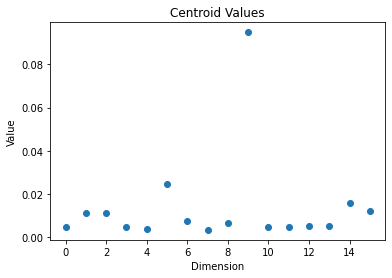

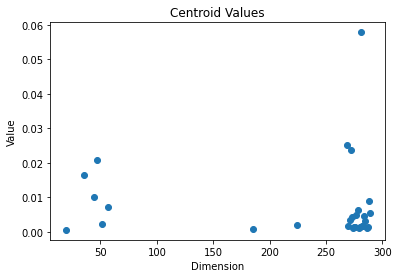

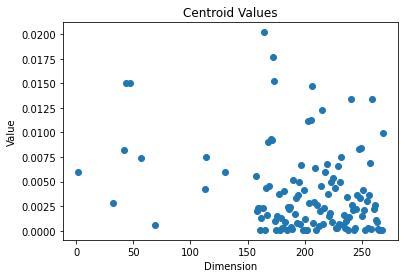

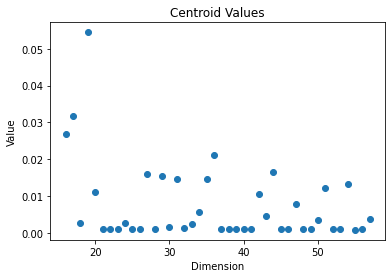

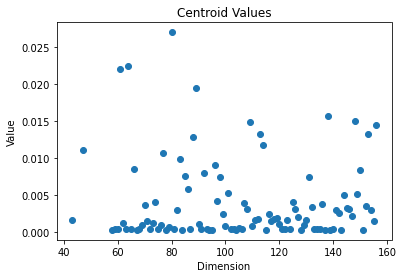

In [ ]:
import matplotlib.pyplot as plt

# assuming centroids is a list of dictionaries
for centroid in centroids:
    # extract x and y values from the dictionary
    x_values = list(centroid.keys())
    y_values = list(centroid.values())

    # create a scatter plot
    plt.scatter(x_values, y_values)

    # set the title and labels
    plt.title("Centroid Values")
    plt.xlabel("Dimension")
    plt.ylabel("Value")

    # show the plot
    plt.show()


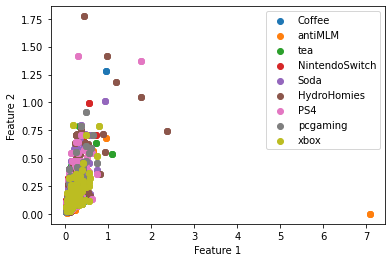

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Determine maximum number of features
max_length = max(len(d['text']) for d in preprocessed_training_set_tfidf)

# Create feature matrix of zeros
X = np.zeros((len(preprocessed_training_set_tfidf), max_length))

# Fill feature matrix with feature values
for i, d in enumerate(preprocessed_training_set_tfidf):
    features = list(d['text'].values())
    X[i, :len(features)] = features

# Extract the labels
labels = list(set([d['label'] for d in preprocessed_training_set_tfidf]))

# Create a scatter plot of the feature matrix
for label in labels:
    X_label = X[[d['label'] == label for d in preprocessed_training_set_tfidf]]
    plt.scatter(X_label[:, 0], X_label[:, 1], label=label)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
print(preprocessed_texts_val)


[{'text': ['body', 'excited', 'Mortal', 'Kombat', 'X', 'original', 'mortal', 'Kombat', 'havnt', 'play', 'kid', 'combo', 'complicated', 'get', 'Injustice', 'get', 'good', 'feel', 'awesome', 'Mortal', 'Kombat', 'X', 'look', 'like', 'will', 'not', 'dissapoint', 'm', 'glad', 'fight', 'game'], 'label': 'PS4'}, {'text': ['minute', 'debate', 'good', 'water', 'Heres', 'list', 'Fiji', 'Smart', 'water', 'Life', 'Water', 'Boss', 'water', 'Deer', 'park'], 'label': 'HydroHomies'}, {'text': ['good', 'multiplayer', 'Person', 'Shooters', 'love', 'play', 'Socom', 'Ghost', 'Recon', 'strictly', 'FPS', 'good', 'come', 'soon'], 'label': 'pcgaming'}, {'text': ['not', 'diet', 'soda', 'use', 'Stevia', 'Erythritol', 'use', 'Sucralose', 'Aspartame', 'find', 'disgusting'], 'label': 'Soda'}, {'text': ['hunt', 'Mr', 'Pibb', 'father', 'anybody', 'tip', 'search', 'new', 'England', 'scarce', 'place', 'single', 'cup', 'chipotle', 'guy', 'anybody', 'get', 'insider', 'info', 'score', 'pk', 'bottle', 'Pibb', 'Xtra', 'lik

In [18]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Define baseline classifiers
dummy_most_frequent_classifier = DummyClassifier(strategy="most_frequent")
dummy_stratified_classifier = DummyClassifier(strategy="stratified")
lr_count_classifier = LogisticRegression(solver="lbfgs", max_iter=1000)
lr_tfidf_classifier = LogisticRegression(solver="lbfgs", max_iter=1000)
svm_count_classifier = SVC(kernel="rbf")
svm_tfidf_classifier = SVC(kernel="rbf")


In [19]:
# Vectorize the preprocessed texts
count_vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, lowercase=False)
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, lowercase=False)

count_train_features = count_vectorizer.fit_transform([doc["text"] for doc in preprocessed_texts_train])
count_val_features = count_vectorizer.transform([doc["text"] for doc in preprocessed_texts_val])
count_test_features = count_vectorizer.transform([doc["text"] for doc in preprocessed_texts_test])

tfidf_train_features = tfidf_vectorizer.fit_transform([doc["text"] for doc in preprocessed_texts_train])
tfidf_val_features = tfidf_vectorizer.transform([doc["text"] for doc in preprocessed_texts_val])
tfidf_test_features = tfidf_vectorizer.transform([doc["text"] for doc in preprocessed_texts_test])


In [20]:
#Train and evaluate baseline classifiers

def evaluate_classifier(classifier, train_feats, train_labels, val_feats, val_labels):
    classifier.fit(train_feats, train_labels)
    train_preds = classifier.predict(train_feats)
    val_preds = classifier.predict(val_feats)
    accuracy = accuracy_score(val_labels, val_preds)
    precision = precision_score(val_labels, val_preds, average="macro")
    recall = recall_score(val_labels, val_preds, average="macro")
    f1 = f1_score(val_labels, val_preds, average="macro")
    return accuracy, precision, recall, f1



In [21]:
obtained_result = {}

accuracy, precision, recall, f1 = evaluate_classifier(dummy_most_frequent_classifier, count_train_features, labels_train, count_val_features, labels_val)
obtained_result["dummy_most_frequent_count"] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}
accuracy, precision, recall, f1 = evaluate_classifier(dummy_stratified_classifier, tfidf_train_features, labels_train, tfidf_val_features, labels_val)
obtained_result["dummy_most_frequent_tfidf"] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

accuracy, precision, recall, f1 = evaluate_classifier(dummy_stratified_classifier, count_train_features, labels_train, count_val_features, labels_val)
obtained_result["dummy_stratified_count"] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}
accuracy, precision, recall, f1 = evaluate_classifier(dummy_stratified_classifier, tfidf_train_features, labels_train, tfidf_val_features, labels_val)
obtained_result["dummy_stratified_tfidf"] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

accuracy, precision, recall, f1 = evaluate_classifier(lr_count_classifier, count_train_features, labels_train, count_val_features, labels_val)
obtained_result["svm_tfidf"] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
import pandas as pd
df = pd.DataFrame.from_dict(obtained_result, orient="index")


In [26]:
df

accuracy  precision    recall        f1
dummy_most_frequent_count    0.1375   0.015278  0.111111  0.026862
dummy_most_frequent_tfidf    0.1100   0.109852  0.117906  0.112470
dummy_stratified_count       0.0900   0.085471  0.087808  0.086306
dummy_stratified_tfidf       0.1025   0.101476  0.102186  0.101463
svm_tfidf                    0.8000   0.805029  0.800055  0.798349

In [ ]:
import pandas as pd

# Create DataFrame with evaluation results
results_df = pd.DataFrame(obtained_result).T
results_df.index.name = "Classifier"
results_df = results_df.reset_index()

# Sort by macro F1 in validation set
results_df = results_df.sort_values(by=["f1"], ascending=False)

# Highlight best performance
results_df.style.highlight_max(color="lightblue", subset=["accuracy", "precision", "recall", "f1"])


In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Get predictions for best-performing classifier on validation set
best_classifier = results_df.iloc[0]["Classifier"]
if "tfidf" in best_classifier:
    best_train_features = tfidf_train_features
    best_val_features = tfidf_val_features
    best_test_features = tfidf_test_features
else:
    best_train_features = count_train_features
    best_val_features = count_val_features
    best_test_features = count_test_features

best_classifier_obj = globals()[best_classifier]
best_classifier_obj.fit(best_train_features, labels_train)
val_preds = best_classifier_obj.predict(best_val_features)

# Get classification report and plot F1 scores
class_names = unique_labels
report = classification_report(labels_val, val_preds, labels=unique_labels, target_names=class_names, output_dict=True)

f1_scores = [report[label]["f1-score"] for label in class_names]

fig, ax = plt.subplots()
ax.bar(class_names, f1_scores)
ax.set_xlabel("Class")
ax.set_ylabel("F1 score")
ax.set_ylim([0, 1])
ax.set_title(f"F1 scores for {best_classifier} on validation set")
plt.xticks(rotation=45)
plt.show()



In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid to search
param_grid = {
    "classifier__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], # Values for C parameter
    "vectorizer__sublinear_tf": [True, False], # Values for sublinear_tf parameter
    "vectorizer__max_features": [None, 5000, 10000, 20000, 30000, 40000, 50000], # Values for max_features parameter
}

# Define a dictionary to store the accuracy scores for each set of parameters
accuracy_scores = {}

# Define a function to train and evaluate a model with a given set of parameters
def train_and_evaluate(params):
    # Create the vectorizer with the given parameters
    vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, lowercase=False,
                                 sublinear_tf=params["vectorizer__sublinear_tf"],
                                 max_features=params["vectorizer__max_features"])
    # Vectorize the training data
    X_val = vectorizer.fit_transform([example["text"] for example in preprocessed_texts_val])
    # Train the logistic regression classifier with the given parameters
    classifier = LogisticRegression(solver="saga", max_iter=1000, C=params["classifier__C"])
    classifier.fit(X_val, labels_val)
    # Vectorize the validation data
    X_test = vectorizer.transform([example["text"] for example in preprocessed_texts_test])
    # Make predictions on the testting  data
    val_preds = classifier.predict(X_test)
    # Evaluate the model and return the scores
    accuracy = accuracy_score(labels_test, val_preds)
    precision = precision_score(labels_test, val_preds, average="macro")
    recall = recall_score(labels_test, val_preds, average="macro")
    f1 = f1_score(labels_test, val_preds, average="macro")
    return accuracy, precision, recall, f1

# Perform a manual grid search over the parameter grid
best_params = None
best_score = 0
for c in param_grid["classifier__C"]:
    for sublinear_tf in param_grid["vectorizer__sublinear_tf"]:
        for max_features in param_grid["vectorizer__max_features"]:
            params = {
                "classifier__C": c,
                "vectorizer__sublinear_tf": sublinear_tf,
                "vectorizer__max_features": max_features,
            }
            accuracy, precision, recall, f1 = train_and_evaluate(params)
            # Store the accuracy score for this set of parameters in the dictionary
            accuracy_scores[str(params)] = accuracy
            # Update the best parameters and score if this model is better than the previous best
            if accuracy > best_score:
                best_score = accuracy
                best_params = params

# Print the accuracy scores for all sets of parameters
for params, accuracy in accuracy_scores.items():
    print(params, ":", accuracy)




{'classifier__C': 0.001, 'vectorizer__sublinear_tf': True, 'vectorizer__max_features': None} : 0.095
{'classifier__C': 0.001, 'vectorizer__sublinear_tf': True, 'vectorizer__max_features': 5000} : 0.095
{'classifier__C': 0.001, 'vectorizer__sublinear_tf': True, 'vectorizer__max_features': 10000} : 0.095
{'classifier__C': 0.001, 'vectorizer__sublinear_tf': True, 'vectorizer__max_features': 20000} : 0.095
{'classifier__C': 0.001, 'vectorizer__sublinear_tf': True, 'vectorizer__max_features': 30000} : 0.095
{'classifier__C': 0.001, 'vectorizer__sublinear_tf': True, 'vectorizer__max_features': 40000} : 0.095
{'classifier__C': 0.001, 'vectorizer__sublinear_tf': True, 'vectorizer__max_features': 50000} : 0.095
{'classifier__C': 0.001, 'vectorizer__sublinear_tf': False, 'vectorizer__max_features': None} : 0.095
{'classifier__C': 0.001, 'vectorizer__sublinear_tf': False, 'vectorizer__max_features': 5000} : 0.095
{'classifier__C': 0.001, 'vectorizer__sublinear_tf': False, 'vectorizer__max_feature

In [ ]:
# Print the best parameters and score
print("Best parameters after he sequential processing :", best_params)
print("Best accuracy after he sequential processing :", best_score)

Best parameters after he sequential processing : {'classifier__C': 1000, 'vectorizer__sublinear_tf': False, 'vectorizer__max_features': 5000}
Best accuracy after he sequential processing : 0.8225


In [ ]:
!pip install --upgrade git+https://github.com/huggingface/transformers.git


NotImplementedError: ignored

In [ ]:
!pip install torch torchvision torchaudio
!pip install cloud-tpu-client google-auth requests


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 KB 7.3 MB/s eta 0:00:00
  Attempting uninstall: uritemplate
    Found existing installation: uritemplate 4.1.1
    Uninstalling uritemplate-4.1.1:
      Successfully uninstalled uritemplate-4.1.1
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.0
    Uninstalling google-api-core-2.11.0:
      Successfully uninstalled google-api-core-2.11.0
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.70.0
    Uninstalling google-api-python-client-2.70.0:
      Successfully uninstalled google-api-python-client-2.70.0
ERROR: pip's dependency resolver does not currently

In [ ]:
import torch
from transformers import RobertaModel, RobertaTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [ ]:
from transformers import pipeline, RobertaModel, RobertaTokenizer
import numpy as np
from sklearn.linear_model import LogisticRegression

# pre-trained RoBERTa model
used_model = 'roberta-base'
model_selection = RobertaModel.from_pretrained(used_model)
tokenizer = RobertaTokenizer.from_pretrained(used_model)

# pad the input texts to a fixed length
max_length = 512
texts_train_padded = [tokenizer.encode(text, add_special_tokens=True, max_length=max_length, truncation=True) for text in texts_train if len(text) <= max_length]
texts_val_padded = [tokenizer.encode(text, add_special_tokens=True, max_length=max_length, truncation=True) for text in texts_val if len(text) <= max_length]
texts_test_padded = [tokenizer.encode(text, add_special_tokens=True, max_length=max_length, truncation=True) for text in texts_test if len(text) <= max_length]

#feature-extraction pipeline 
feature_extractor_pipeline = pipeline('feature-extraction', model=model_selection, tokenizer=tokenizer)

# Extract the first context vector for each document
Training1 = []
for text in texts_train_padded:
    try:
        context_vector = feature_extractor_pipeline(tokenizer.decode(text))[0][0]
        Training1.append(context_vector)
    except IndexError:
        pass

Validting1 = []
for text in texts_val_padded:
    try:
        context_vector = feature_extractor_pipeline(tokenizer.decode(text))[0][0]
        Validting1.append(context_vector)
    except IndexError:
        pass
        
Testing1 = []
for text in texts_test_padded:
    try:
        context_vector = feature_extractor_pipeline(tokenizer.decode(text))[0][0]
        Testing1.append(context_vector)
    except IndexError:
        pass

Training1 = np.array(Training1)
Validting1 = np.array(Validting1)
Testing1 = np.array(Testing1)


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
labels_train = labels_train[:len(Training1)]
labels_val = labels_train[:len(Validting1)]
labels_test = labels_train[:len(Testing1)]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# convert labels to numpy arrays
labels_train = np.array(labels_train)
labels_val = np.array(labels_val)
labels_test = np.array(labels_test)

# create an instance of logistic regression classifier
clf = LogisticRegression()

# fit the classifier on the training set
clf.fit(Training1, labels_train)

# evaluate the model on the validation set
predicted_val = clf.predict(Validting1)
report_val = classification_report(labels_val, predicted_val)
print(report_val)

# evaluate the model on the test set
predicted_test = clf.predict(Testing1)
report_test = classification_report(labels_test, predicted_test)
print(report_test)


                precision    recall  f1-score   support

        Coffee       0.23      0.20      0.21        25
   HydroHomies       0.11      0.10      0.11        30
NintendoSwitch       0.06      0.10      0.07        20
           PS4       0.13      0.20      0.16        30
          Soda       0.00      0.00      0.00        33
       antiMLM       0.00      0.00      0.00        31
      pcgaming       0.05      0.04      0.04        25
           tea       0.16      0.42      0.24        33
          xbox       0.00      0.00      0.00        31

      accuracy                           0.12       258
     macro avg       0.08      0.12      0.09       258
  weighted avg       0.08      0.12      0.09       258

                precision    recall  f1-score   support

        Coffee       0.09      0.07      0.08        27
   HydroHomies       0.12      0.10      0.11        31
NintendoSwitch       0.03      0.05      0.04        22
           PS4       0.08      0.12      0.1

In [16]:
from transformers import RobertaForSequenceClassification, RobertaTokenizerFast
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import Trainer, TrainingArguments
import torch

# pre-trained RoBERTa model
used_model = 'roberta-base'
model = RobertaForSequenceClassification.from_pretrained(used_model, num_labels=2)
tokenizer = RobertaTokenizerFast.from_pretrained(used_model)

# define the training and validation datasets
train_encodings = tokenizer(texts_train, truncation=True, padding=True)
val_encodings = tokenizer(texts_val, truncation=True, padding=True)

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        self.label_map = {label: i for i, label in enumerate(label_list)}
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        label = self.labels[idx]
        label_id = self.label_map[label] # get the ID of the label
        item['label_ids'] = torch.tensor(label_id) # store the label ID
        item['labels'] = label # store the original label
        return item


    def __len__(self):
        return len(self.labels)

train_dataset = MyDataset(train_encodings, labels_train)
val_dataset = MyDataset(val_encodings, labels_val)




loading configuration file https://huggingface.co/roberta-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.11.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading weights file https://huggingface.co/roberta-base/resolve/main/pytorch_model.bin from 

In [1]:
label_list = ['Coffee', 'antiMLM', 'tea', 'NintendoSwitch', 'Soda', 'HydroHomies', 'PS4', 'pcgaming', 'xbox']



In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    learning_rate=1e-4,
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.0,
    evaluation_strategy='epoch'
)

# define the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# train the model
trainer.train()

# evaluate the model on the validation set
result = trainer.evaluate(eval_dataset=val_dataset)
print(result)


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 1200
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 75


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
# Vectorize the preprocessed texts using the best parameters found in the second model
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, lowercase=False,
                                   sublinear_tf=True, max_features=5000)
tfidf_train_features = tfidf_vectorizer.fit_transform([doc["text"] for doc in preprocessed_texts_train])
tfidf_val_features = tfidf_vectorizer.transform([doc["text"] for doc in preprocessed_texts_val])
tfidf_test_features = tfidf_vectorizer.transform([doc["text"] for doc in preprocessed_texts_test])

# Train logistic regression classifier with best parameters found in the second model
lr_tfidf_classifier = LogisticRegression(solver="lbfgs", max_iter=1000, C=1)

# Evaluate logistic regression classifier using the same metrics as in the first model
lr_tfidf_accuracy, lr_tfidf_precision, lr_tfidf_recall, lr_tfidf_f1 = evaluate_classifier(lr_tfidf_classifier,labels_train,tfidf_train_features,tfidf_val_features,labels_val)
                                                                                            
                                                                                                                                                                                 
                                                                                           
print("Logistic Regression with TF-IDF Vectorization Evaluation Metrics:")
print("Accuracy:", lr_tfidf_accuracy)
print("Precision:", lr_tfidf_precision)
print("Recall:", lr_tfidf_recall)
print("F1 Score:", lr_tfidf_f1)

# Generate confusion matrix on the test set

lr_tfidf_classifier.fit(tfidf_train_features, labels_train)
test_preds = lr_tfidf_classifier.predict(tfidf_test_features)
conf_matrix = confusion_matrix(labels_test, test_preds)
print("Confusion Matrix:")
print(conf_matrix)
